<a href="https://colab.research.google.com/github/As2909/Projects/blob/main/DL_Fashion_MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seeding for reproducibility

In [1]:
import random
random.seed(12)

import numpy as np
np.random.seed(12)

import tensorflow as tf
tf.random.set_seed(12)

Import the dependencies

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Data Curation

In [3]:
# load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist


In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Data Preprocessing

In [5]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [6]:
len(train_images), len(train_labels)

(60000, 60000)

In [7]:
len(test_images), len(test_labels)

(10000, 10000)

In [8]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [9]:
type(train_images[0])

numpy.ndarray

In [10]:
train_images[0].shape

(28, 28)

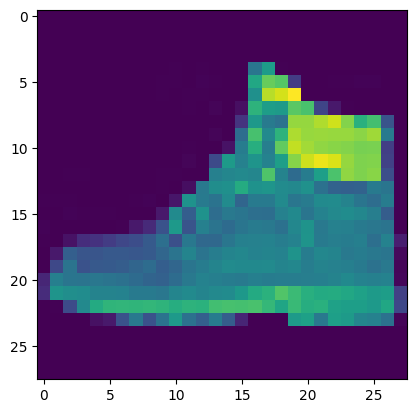

In [11]:
plt.imshow(train_images[90])
plt.show()

In [12]:
train_labels[90]

9

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
# Normalize the pixelz values to be between 0 and 1
train_images = train_images / 255
test_images = test_images / 255

In [15]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

In [16]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Building the CNN**

In [17]:
num_of_classes = 10

In [37]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #Add the Dense layers on Top
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_of_classes, activation="softmax")
])

In [38]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [40]:
history = model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=100, batch_size=5000, callbacks=early_stopping)

Epoch 1/100
12/12 [==============================] - 5s 97ms/step - loss: 2.0469 - accuracy: 0.4031 - val_loss: 1.5069 - val_accuracy: 0.5539
Epoch 2/100
12/12 [==============================] - 1s 74ms/step - loss: 1.1013 - accuracy: 0.6376 - val_loss: 0.8805 - val_accuracy: 0.6753
Epoch 3/100
12/12 [==============================] - 1s 75ms/step - loss: 0.8038 - accuracy: 0.7015 - val_loss: 0.7614 - val_accuracy: 0.7221
Epoch 4/100
12/12 [==============================] - 1s 75ms/step - loss: 0.7089 - accuracy: 0.7353 - val_loss: 0.6928 - val_accuracy: 0.7395
Epoch 5/100
12/12 [==============================] - 1s 76ms/step - loss: 0.6459 - accuracy: 0.7582 - val_loss: 0.6391 - val_accuracy: 0.7620
Epoch 6/100
12/12 [==============================] - 1s 77ms/step - loss: 0.5991 - accuracy: 0.7743 - val_loss: 0.5964 - val_accuracy: 0.7797
Epoch 7/100
12/12 [==============================] - 1s 81ms/step - loss: 0.5636 - accuracy: 0.7879 - val_loss: 0.5706 - val_accuracy: 0.7880
Epoch 

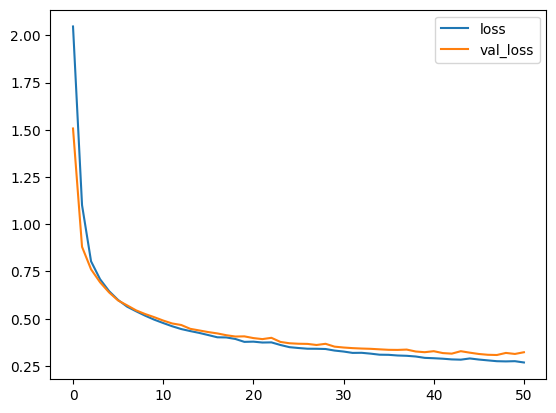

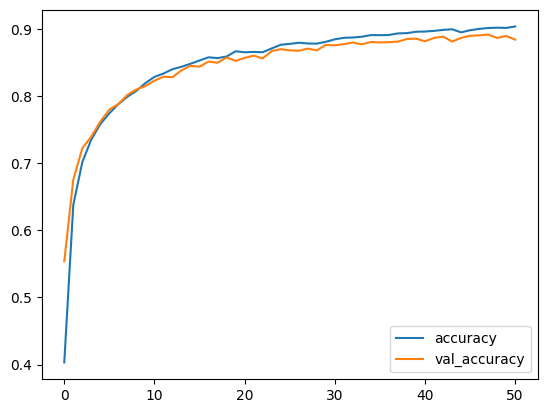

In [41]:
h = history
plt.plot(h.history["loss"], label="loss")
plt.plot(h.history["val_loss"], label="val_loss")
plt.legend(loc="upper right")
plt.show()

plt.plot(h.history["accuracy"], label="accuracy")
plt.plot(h.history["val_accuracy"], label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [42]:
trained_model = model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
